# Doel

Het doel van deze notebook is om de beste instellingen voor de `blackdotdetector.py` class te voorspellen aan de hand van eigenschappen van de foto.

Aanvankelijk waren dit de in- en outputs die ik in gedachten had voor het model:

**In:**
* zoom, resolutie, mean kleur foto, kleurverdeling (histogram)

**Out:**
* cell threshold, min_area, adaptive threshold, threshold/blur stippen


Om technische redenen (resolutie bestaat uit 2 cijfers) en om het model zo klein mogelijk te houden, zodat het op minder data getrained kan worden heb ik het oorspronkelijke plan naar dit veranderd:

**In:**
* schaal van foto, hoogte foto, breedte foto, mean kleur foto, contrast

**Out:**
* min_area, dot_thresh

### Dit is de data:

In [134]:
paths = ['data/Complemented/2024-08i compl OADChi E2_17.tif','data/Mutant/2024-08i mutant Mtb 2nd exp_D4_02.tif','data/Mutant/2024-08i_mutant Mtb_D5_18.tif','data/Complemented/2024-08i compl OADChi E2_02.tif','data/Mutant/2024-08i_mutant Mtb_D5_17.tif',
         'data\Mutant/2024-08i mutant Mtb 2nd exp_D4_01.tif','data/Wildtype/2024_08i_WT_D3_OADChi_05.tif','data/Wildtype/2024_08i_WT_D3_OADChi_07.tif','data/Wildtype/2024_08i_WT_D3_OADChi_20.tif','data/Wildtype/2024-08i WT Mtb 2nd exp_D2_01.tif',
         'data/Wildtype/2024-08i WT Mtb 2nd exp_D2_05.tif','data/Wildtype/2024-08i WT Mtb 2nd exp_D2_12.tif','data/Wildtype/2024-08i WT Mtb 2nd exp_D2_14.tif','data/Wildtype/2024-08i WT Mtb 2nd exp_D2_20.tif','data/Wildtype/2024-08i WT Mtb 2nd exp_D2_23.tif',
         'data/Complemented/2024-08i compl OADChi E2_09.tif','data/Mutant/2024-08i_mutant Mtb_D5_37.tif','data/Complemented/2024-08i compl OADChi E2_05.tif','data/Complemented/2024-08i compl OADChi E2_03.tif','data/Complemented/2024-08i compl OADChi E2_08.tif',
         'data/Complemented/2024-08i compl OADChi E2_10.tif','data/Complemented/2024-08i compl OADChi E2_12.tif','data\Complemented/2024-08i_compl_OADChi_E1_42.tif']

In [ ]:
y = [[30,40],[120,35],[100,45],[60,45],[80,45],[80,45],[100,45],[100,45],[90,45],[90,45],[50,45],
     [40,45],[100,45],[40,45],[40,45],[45,45],[90,45],[73,45],[63,45],[76,45],[82,45],[78,45]]

Het viel me tijdens het maken van de data dat de dot_thresh vrijwel geen invloed heeft, en alle foto's op `45` werken. dot_tresh ga ik daarom ook verwijderen uit de data, en als input van de class zelf. Later kwam ik erachter dat bij een lagere resolutie de blur lager moet. `dot_thresh` wordt vanaf nu vervangen met `dot_blur`.

In [ ]:
y = [[30,13],[120,13],[100,13],[60,13],[80,13],[80,13],[100,13],[100,13],[90,13],[90,13],[50,13],
     [40,13],[100,13],[40,13],[40,13],[45,13],[90,13],[73,13],[63,13],[76,13],[82,13],[78,13],
     [30,7]]

De output van het model is nu alleen nog maar min_area

De volgende stap is de input van het model maken. Er is een lijst met alle bestanden, `paths`. Bij elk bestand in deze lijst verzameld de volgende functie `img_info()` wat informatie.

In [137]:
from bar_and_scale_finder import scale_finder
import cv2
import numpy as np

def img_info(image_path):
    image = cv2.imread(image_path)
    mean = float(image.mean())
    h,w =  image.shape[0:2]
    contrast = float(np.std(image))
    return [scale_finder(image_path), h,w, mean, contrast]

x=[]
for path in paths:
    x.append(img_info(path))

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
d:\HW\gold_nanoparticle_TC\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note

# Data verkennen

In [138]:
import pandas as pd
data = {'in':x, 'out':y}
df = pd.DataFrame.from_dict(data)
df[['scale','height','width','mean','contrast']] = pd.DataFrame(df['in'].tolist())
df[['dot_size','dot_blur']] = pd.DataFrame(df['out'].tolist())
df.pop('in')
df.pop('out')
df.head()

,scale,height,width,mean,contrast,dot_size,dot_blur
0,0.696864,3840,5120,183.776028,32.895178,30,13
1,0.502513,3840,5120,178.834893,40.377920,120,13
2,0.502513,3840,5120,192.970494,57.574980,100,13
3,0.696864,3840,5120,208.194480,36.154862,60,13
4,0.502513,3840,5120,206.937222,40.819357,80,13


In [139]:
df.mean()

scale          0.575061
height      3756.521739
width       5008.695652
mean         191.697399
contrast      42.232019
dot_size      72.043478
dot_blur      12.739130
dtype: float64

In [ ]:
print(f"Unique heights:{df['height'].unique()}. Unique widths: {df['width'].unique()}")

Unique heights:[3840 1920]. Unique widths: [5120 2560]


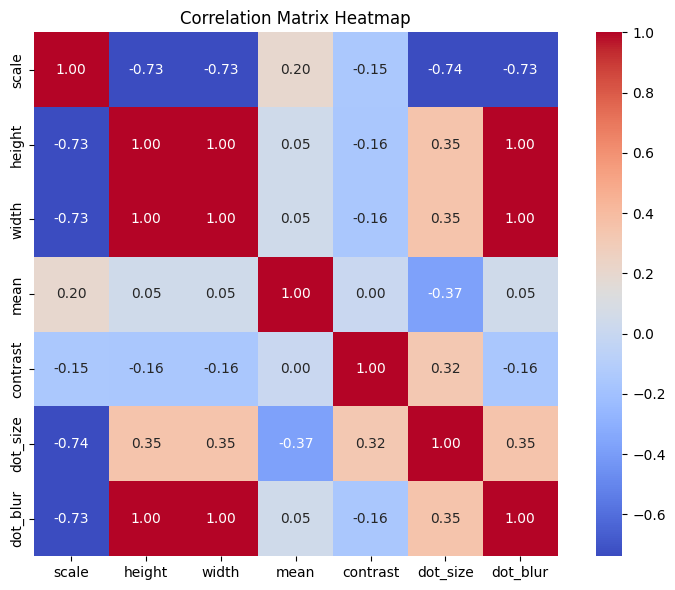

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

# Trainen en testen

In [142]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

x = np.array(x)
y = np.array(y)

# Wrap models that don't natively support multi-output
models = {
    "RandomForest": RandomForestRegressor(n_estimators=10),
    "KNN": KNeighborsRegressor(n_neighbors=3),
    "SVR": MultiOutputRegressor(SVR()),
    "GradientBoosting": MultiOutputRegressor(GradientBoostingRegressor(n_estimators=10)),
    "Dummy": DummyRegressor(),
    "LinearRegression": LinearRegression(),  # LinearRegression supports multi-output natively
}

# Perform Leave-One-Out Cross Validation
for name, model in models.items():
    loo = LeaveOneOut()
    y_true, y_pred = [], []

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        y_true.append(y_test[0])
        y_pred.append(prediction[0])

    mse = mean_squared_error(y_true, y_pred)
    print(f"{name} LOOCV Mean Squared Error: {mse:.4f}")

RandomForest LOOCV Mean Squared Error: 186.7450
KNN LOOCV Mean Squared Error: 327.4855
SVR LOOCV Mean Squared Error: 360.3286
GradientBoosting LOOCV Mean Squared Error: 182.5336
Dummy LOOCV Mean Squared Error: 350.8306
LinearRegression LOOCV Mean Squared Error: 168.0964


In [143]:
final_model = LinearRegression()
final_model.fit(x, y)

LinearRegression()

In [154]:
test = [img_info('data/Complemented/2024-08i_compl_OADChi_E1_36.tif')] #Moet 2d om wat voor reden
print(test)
final_model.predict(test)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[[1.0050251256281406, 1920, 2560, 187.80274915907117, 47.71178522594018]]


d:\HW\gold_nanoparticle_TC\.venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


array([[31.45437208,  7.        ]])

De test-voorspelling klopt, 90 is de correcte min_area